In [160]:
import utilities as util
import importlib
import matplotlib.pyplot as plt
importlib.reload(util)
import numpy as np
import pandas as pd

['c:\\Users\\Vince\\OneDrive\\Documenten\\School\\TU\\2223\\modelling-networks-and-data-analysis\\project_higgs\\higgs-twitter-network-science\\src', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\DLLs', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\lib', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39', '', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages', 'c:\\users\\vince\\projects\\fantoom\\emmel\\basy-synths', 'c:\\users\\vince\\projects\\fantoom\\emmel\\evairy', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\win32', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\win32\\lib', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\Pythonwin', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\IPy

In [161]:
reply_path = '../log/reply.csv'
retweet_path = '../log/retweet.csv'
mention_path = '../log/mention.csv'

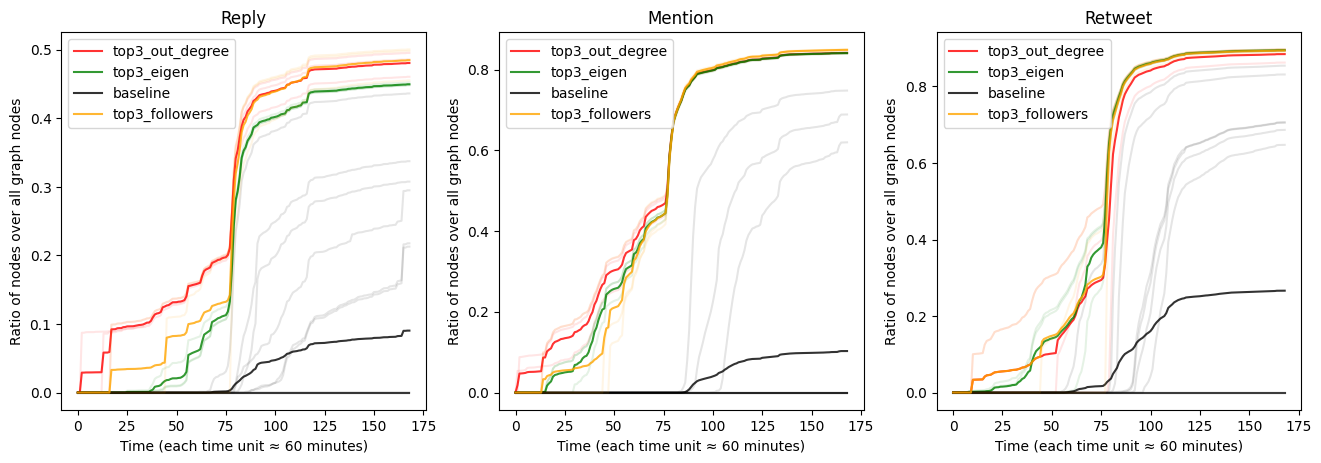

In [162]:
fig = plt.figure(figsize = (16, 5), dpi=100)
axes = fig.subplots(1, 3)
util.plot_all_graph_metrics(axes[0], reply_path, graph_name="Reply")
util.plot_all_graph_metrics(axes[1], mention_path, graph_name="Mention")
util.plot_all_graph_metrics(axes[2], retweet_path, graph_name="Retweet")

In [193]:
def metric(path, name):
    index = []
    out = {}
    for kw in util.BASE_KEYWORDS:
        m, v = util.get_average_information_spreading_from_log(path, util.get_metric_name_from_keyword(kw))
        end_values = v[:, -1]
        
        a = []
        for i in range(v.shape[0]):
            if end_values[i] > 0:
                a.append(np.argmax(np.where(v[i] > 0.8*v[i, -1], 1, 0)))
        if len(a) == 0:
            a = [167]
        
        out[kw] = {}
        out[kw][(name, 'end')] = np.mean(end_values)
        out[kw][(name,'start_time')] = np.mean(np.argmax(np.where(v > 0, 1, 0), axis = 1))
        out[kw][(name,'max_derivative')] = np.mean(np.max(np.diff(v, axis =1 ), axis =1))
        out[kw][(name,'T80')] = np.mean(a)
        index.append((name, kw))
    return out, index

In [194]:
reply_data,index = metric(reply_path, 'reply')
mention_data,index = metric(mention_path, 'mention')
retweet_data,index = metric(retweet_path, 'retweet')

[84, 83, 83]
[86, 85, 86]
[165, 106, 0, 165, 0, 0, 0, 0, 0, 0, 0, 88, 0, 0, 0, 0, 114, 80, 148]
[89, 83, 83]
[80, 81, 81]
[81, 81, 81]
[102, 0, 134, 0, 0, 0, 0, 0, 0, 0, 117, 0, 0, 0, 0, 0, 0, 0, 0]
[81, 81, 81]
[80, 87, 81]
[82, 81, 81]
[0, 112, 0, 0, 0, 115, 0, 0, 0, 81, 0, 92, 0, 0, 88, 112, 111, 0, 0]
[83, 81, 80]


In [192]:
index = pd.MultiIndex.from_tuples(index, names=['graph', 'metric'])

In [188]:
df = pd.concat([pd.DataFrame(reply_data), pd.DataFrame(mention_data), pd.DataFrame(retweet_data)], axis=0)

In [189]:
df

top3_out_degree  top3_eigen   baseline  top3_followers
reply   end                    0.480820    0.449850   0.090381        0.484891
        start_time            10.666667   26.666667  25.800000       46.666667
        max_derivative         0.090765    0.064249   0.017512        0.113743
        T80                   83.333333   85.666667  45.578947       85.000000
mention end                    0.841223    0.840782   0.102837        0.848956
        start_time             5.666667   20.000000  13.500000       35.666667
        max_derivative         0.092467    0.090126   0.012301        0.109379
        T80                   80.666667   81.000000  18.578947       81.000000
retweet end                    0.884675    0.895021   0.266292        0.893869
        start_time            47.333333   23.333333  27.450000       44.333333
        max_derivative         0.132372    0.113181   0.039359        0.177444
        T80                   82.666667   81.333333  37.421053       81.333333

In [180]:
print(df.to_latex())

\begin{tabular}{llrrrr}
\toprule
        &     &  top3\_out\_degree &  top3\_eigen &   baseline &  top3\_followers \\
\midrule
reply & end &         0.480820 &    0.449850 &   0.090381 &        0.484891 \\
        & start\_time &        10.666667 &   26.666667 &  25.800000 &       46.666667 \\
        & max\_derivative &         0.090765 &    0.064249 &   0.017512 &        0.113743 \\
        & T80 &        83.333333 &   85.666667 &  43.300000 &       85.000000 \\
mention & end &         0.841223 &    0.840782 &   0.102837 &        0.848956 \\
        & start\_time &         5.666667 &   20.000000 &  13.500000 &       35.666667 \\
        & max\_derivative &         0.092467 &    0.090126 &   0.012301 &        0.109379 \\
        & T80 &        80.666667 &   81.000000 &  17.650000 &       81.000000 \\
retweet & end &         0.884675 &    0.895021 &   0.266292 &        0.893869 \\
        & start\_time &        47.333333 &   23.333333 &  27.450000 &       44.333333 \\
        & max\_de

In [166]:
np.argmax(np.where(v >  v[:, -1], 1, 0), axis = 1)

ValueError: operands could not be broadcast together with shapes (3,169) (3,) 

98
91
91
